<a href="https://colab.research.google.com/github/dgavieira/natural-language-processing/blob/main/trabalho_4_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
url = '/content/drive/MyDrive/Datasets/factoryReports.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df

,Description,Category,Urgency,Resolution,Cost
0,Items are occasionally getting stuck in the sc...,Mechanical Failure,Medium,Readjust Machine,45
1,Loud rattling and banging sounds are coming fr...,Mechanical Failure,Medium,Readjust Machine,35
2,There are cuts to the power when starting the ...,Electronic Failure,High,Full Replacement,16200
3,Fried capacitors in the assembler.,Electronic Failure,High,Replace Components,352
4,Mixer tripped the fuses.,Electronic Failure,Low,Add to Watch List,55
...,...,...,...,...,...
475,Things stuck in scanner spools.,Mechanical Failure,Medium,Readjust Machine,45
476,Robot arm is rattling.,Mechanical Failure,Low,Add to Watch List,71
477,Qualifying reel keeps bending.,Mechanical Failure,Medium,Readjust Machine,39
478,Sparks and smoke in the mixer at startup.,Electronic Failure,High,Full Replacement,9000


# Baseline

embedding - 50 neurônios

LSTM - 80 neurônios

In [6]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
# Carregar os dados
url = '/content/drive/MyDrive/Datasets/factoryReports.csv'
data = pd.read_csv(url)
data

,Description,Category,Urgency,Resolution,Cost
0,Items are occasionally getting stuck in the sc...,Mechanical Failure,Medium,Readjust Machine,45
1,Loud rattling and banging sounds are coming fr...,Mechanical Failure,Medium,Readjust Machine,35
2,There are cuts to the power when starting the ...,Electronic Failure,High,Full Replacement,16200
3,Fried capacitors in the assembler.,Electronic Failure,High,Replace Components,352
4,Mixer tripped the fuses.,Electronic Failure,Low,Add to Watch List,55
...,...,...,...,...,...
475,Things stuck in scanner spools.,Mechanical Failure,Medium,Readjust Machine,45
476,Robot arm is rattling.,Mechanical Failure,Low,Add to Watch List,71
477,Qualifying reel keeps bending.,Mechanical Failure,Medium,Readjust Machine,39
478,Sparks and smoke in the mixer at startup.,Electronic Failure,High,Full Replacement,9000


In [8]:
# Limitar a descrição a 10 palavras
data['Description'] = data['Description'].apply(lambda x: ' '.join(x.split()[:10]))
data

,Description,Category,Urgency,Resolution,Cost
0,Items are occasionally getting stuck in the sc...,Mechanical Failure,Medium,Readjust Machine,45
1,Loud rattling and banging sounds are coming fr...,Mechanical Failure,Medium,Readjust Machine,35
2,There are cuts to the power when starting the ...,Electronic Failure,High,Full Replacement,16200
3,Fried capacitors in the assembler.,Electronic Failure,High,Replace Components,352
4,Mixer tripped the fuses.,Electronic Failure,Low,Add to Watch List,55
...,...,...,...,...,...
475,Things stuck in scanner spools.,Mechanical Failure,Medium,Readjust Machine,45
476,Robot arm is rattling.,Mechanical Failure,Low,Add to Watch List,71
477,Qualifying reel keeps bending.,Mechanical Failure,Medium,Readjust Machine,39
478,Sparks and smoke in the mixer at startup.,Electronic Failure,High,Full Replacement,9000


In [9]:
# Codificar as categorias
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])
categories = to_categorical(data['Category'])

In [10]:
categories

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [11]:
# Tokenizar as descrições
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Description'])
sequences = tokenizer.texts_to_sequences(data['Description'])
word_index = tokenizer.word_index

In [12]:
word_index

{'the': 1,
 'in': 2,
 'mixer': 3,
 'scanner': 4,
 'is': 5,
 'of': 6,
 'assembler': 7,
 'to': 8,
 'from': 9,
 'agent': 10,
 'sound': 11,
 'robot': 12,
 'sorter': 13,
 'arm': 14,
 'are': 15,
 'on': 16,
 'stuck': 17,
 'sounds': 18,
 'coolant': 19,
 'fuse': 20,
 'software': 21,
 'blender': 22,
 'blown': 23,
 'heard': 24,
 'will': 25,
 'controller': 26,
 'overheating': 27,
 'constructing': 28,
 'power': 29,
 'a': 30,
 'spools': 31,
 'appearing': 32,
 'items': 33,
 'off': 34,
 'belt': 35,
 'by': 36,
 'products': 37,
 'some': 38,
 'rattling': 39,
 'and': 40,
 'inside': 41,
 'smoke': 42,
 'when': 43,
 'up': 44,
 'out': 45,
 'has': 46,
 'things': 47,
 'conveyor': 48,
 'time': 49,
 'sometimes': 50,
 'reel': 51,
 'supply': 52,
 'line': 53,
 'jammed': 54,
 'loud': 55,
 'plant': 56,
 'high': 57,
 'emitted': 58,
 'programming': 59,
 'pitched': 60,
 'at': 61,
 'construction': 62,
 'material': 63,
 'get': 64,
 'engine': 65,
 'occasionally': 66,
 'there': 67,
 'bent': 68,
 'assembly': 69,
 'electrical'

In [13]:
# Padronizar as sequências para que todas tenham comprimento 10
X = pad_sequences(sequences, maxlen=10)
y = categories

In [14]:
# Dividir o conjunto de dados em treino (80%), validação (10%) e teste (10%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Verificar as proporções
print(f"Conjunto de Treino: {len(X_train)} exemplos")
print(f"Conjunto de Validação: {len(X_val)} exemplos")
print(f"Conjunto de Teste: {len(X_test)} exemplos")

Conjunto de Treino: 336 exemplos
Conjunto de Validação: 48 exemplos
Conjunto de Teste: 96 exemplos


In [15]:
# Definir o modelo LSTM
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=50, input_length=10),
    LSTM(80, activation='tanh'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia do modelo no conjunto de teste: {accuracy * 100:.2f}%")

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.3955 - loss: 1.3689 - val_accuracy: 0.4167 - val_loss: 1.2947
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3962 - loss: 1.2689 - val_accuracy: 0.4167 - val_loss: 1.1987
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4129 - loss: 1.1554 - val_accuracy: 0.4167 - val_loss: 1.1399
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4537 - loss: 1.1095 - val_accuracy: 0.4375 - val_loss: 1.0478
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4965 - loss: 0.9305 - val_accuracy: 0.7500 - val_loss: 0.8602
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7539 - loss: 0.7105 - val_accuracy: 0.6667 - val_loss: 0.6716
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8183 - loss: 0.5184 - val_accuracy: 0.7917 - val_loss: 0.5194
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8900 - loss: 0.3444 - val_accuracy: 0.9167 - val_loss

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 10, 50)              │          23,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 80)                  │          41,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │             324 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 196,484 (767.52 KB)

 Trainable params: 65,494 (255.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 130,990 (511.68 KB)

In [19]:
# 3. Mostrar a acurácia no conjunto de validação
val_accuracy = history.history['val_accuracy'][-1]
print(f"Acurácia obtida no conjunto de validação: {val_accuracy * 100:.2f}%")

Acurácia obtida no conjunto de validação: 85.42%


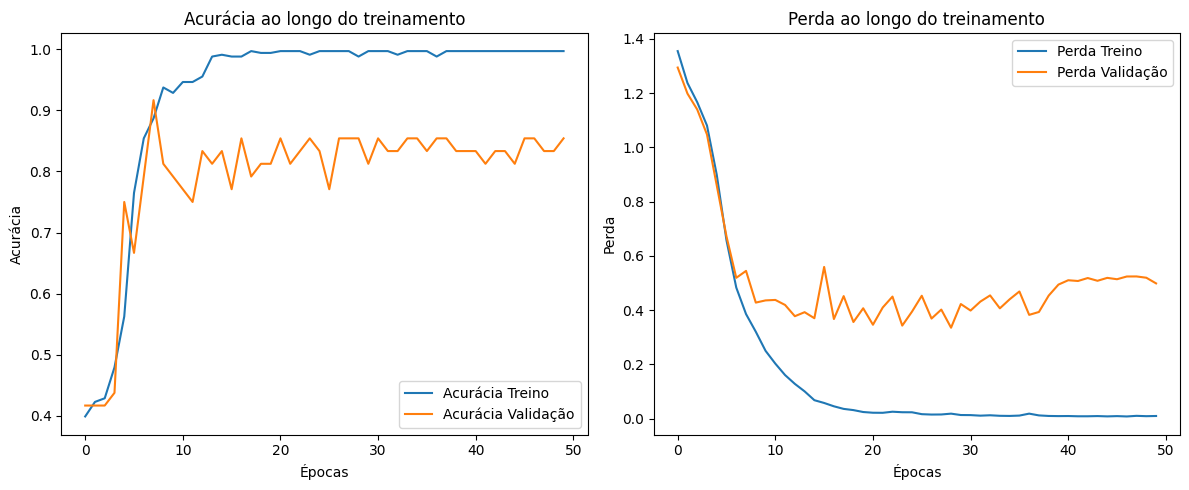

In [20]:
import matplotlib.pyplot as plt
# 2. Mostrar as curvas de treinamento (acurácia e perda)
plt.figure(figsize=(12, 5))

# Curva de acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia ao longo do treinamento')
plt.legend()

# Curva de perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda Treino')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda ao longo do treinamento')
plt.legend()

plt.tight_layout()
plt.show()

# Arquitetura 1

Embedding = 50 neurônios

LSTM1 = 50 neurônios

LSTM2 = 100 neurônios

descrição com 10 palavras

Arquitetura do modelo:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.3064 - loss: 1.3679 - val_accuracy: 0.4167 - val_loss: 1.2625
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4366 - loss: 1.2359 - val_accuracy: 0.4167 - val_loss: 1.1940
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3657 - loss: 1.1840 - val_accuracy: 0.5625 - val_loss: 1.1828
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5805 - loss: 1.1574 - val_accuracy: 0.4167 - val_loss: 1.1040
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4560 - loss: 1.0414 - val_accuracy: 0.6875 - val_loss: 0.9449
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7891 - loss: 0.7663 - val_accuracy: 0.7917 - val_loss: 0.6598
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8913 - loss: 0.4308 - val_accuracy: 0.7708 - val_loss: 0.5213
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8688 - loss: 0.3534 - val_accuracy: 0.7292 - val_lo

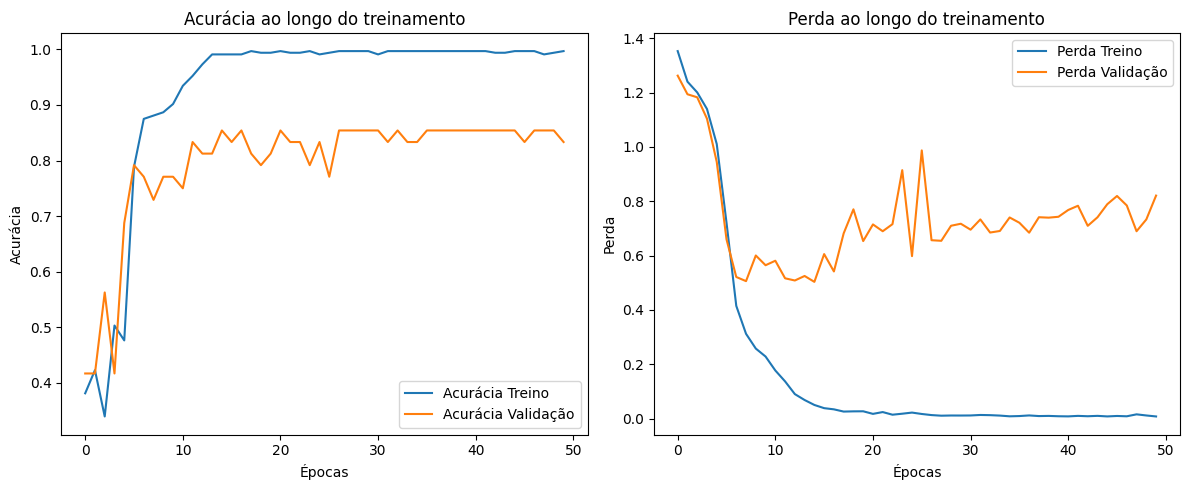

Acurácia obtida no conjunto de validação: 83.33%
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9466 - loss: 0.1699 
Acurácia do modelo no conjunto de teste: 94.79%


In [21]:
# Definir o modelo LSTM com duas camadas LSTM
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=50, input_length=10),
    LSTM(50, activation='tanh', return_sequences=True),
    LSTM(100, activation='tanh'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar a arquitetura da rede
print("Arquitetura do modelo:")
model.summary()

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Mostrar as curvas de treinamento (acurácia e perda)
plt.figure(figsize=(12, 5))

# Curva de acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia ao longo do treinamento')
plt.legend()

# Curva de perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda Treino')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda ao longo do treinamento')
plt.legend()

plt.tight_layout()
plt.show()

# Mostrar a acurácia no conjunto de validação
val_accuracy = history.history['val_accuracy'][-1]
print(f"Acurácia obtida no conjunto de validação: {val_accuracy * 100:.2f}%")

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia do modelo no conjunto de teste: {test_accuracy * 100:.2f}%")

In [22]:
# Mostrar a acurácia no conjunto de validação
val_accuracy = history.history['val_accuracy'][-1]
print(f"Acurácia obtida no conjunto de validação: {val_accuracy * 100:.2f}%")

Acurácia obtida no conjunto de validação: 83.33%


# Arquitetura 2

Embedding 1 = 30 neuronios

Embedding 2 = 70 neuronios

LSTM = 50 neuronios

descricao 10 palavras

Arquitetura do modelo:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 10, 30)         │         13,950 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 10, 70)         │         32,550 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 10, 100)        │              0 │ embedding_2[0][0],     │
│                           │                        │                │ embedding_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 50)             │         30,200 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 4)              │            204 │ lstm_3[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 76,904 (300.41 KB)

 Trainable params: 76,904 (300.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3547 - loss: 1.3658 - val_accuracy: 0.5208 - val_loss: 1.2884
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6666 - loss: 1.2342 - val_accuracy: 0.5208 - val_loss: 1.1794
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5459 - loss: 1.1059 - val_accuracy: 0.6667 - val_loss: 1.0897
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7287 - loss: 0.9746 - val_accuracy: 0.6875 - val_loss: 0.9145
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7707 - loss: 0.7313 - val_accuracy: 0.7292 - val_loss: 0.6561
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8056 - loss: 0.5190 - val_accuracy: 0.8333 - val_loss: 0.5249
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9145 - loss: 0.3464 - val_accuracy: 0.8958 - val_loss: 0.3967
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9466 - loss: 0.2721 - val_accuracy: 0.8750 - val_los

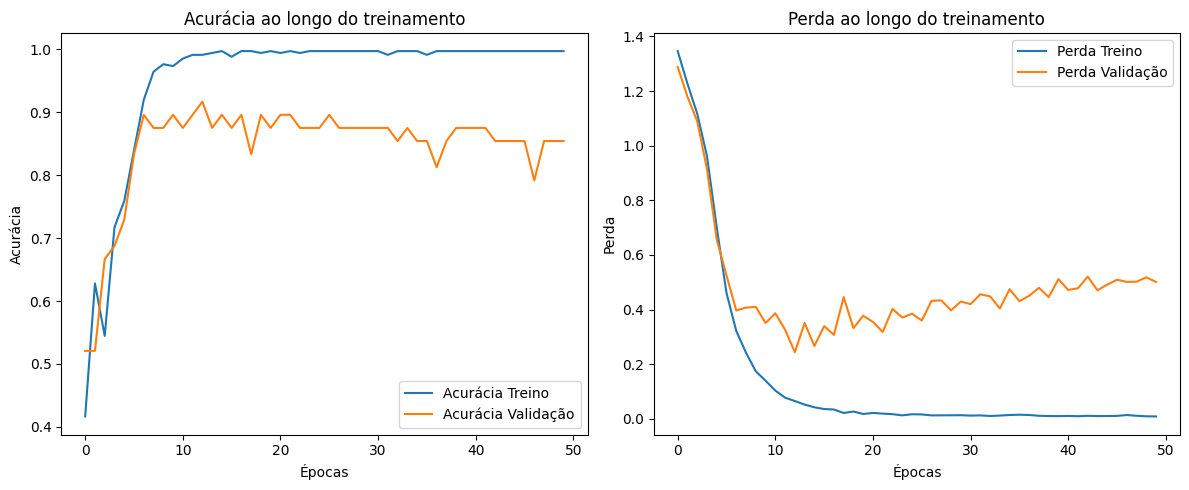

Acurácia obtida no conjunto de validação: 85.42%
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9414 - loss: 0.1836 
Acurácia do modelo no conjunto de teste: 93.75%


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Carregar os dados
data = pd.read_csv('/content/drive/MyDrive/Datasets/factoryReports.csv')

# Limitar a descrição a 10 palavras
data['Description'] = data['Description'].apply(lambda x: ' '.join(x.split()[:10]))

# Codificar as categorias
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])
categories = to_categorical(data['Category'])

# Tokenizar as descrições
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Description'])
sequences = tokenizer.texts_to_sequences(data['Description'])
word_index = tokenizer.word_index

# Padronizar as sequências para que todas tenham comprimento 10
X = pad_sequences(sequences, maxlen=10)
y = categories

# Dividir o conjunto de dados em treino (80%), validação (10%) e teste (10%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Definir as entradas
input_layer = Input(shape=(10,))

# Primeira camada de Embedding
embedding1 = Embedding(input_dim=len(word_index) + 1, output_dim=30, input_length=10)(input_layer)

# Segunda camada de Embedding (apenas para referência, a saída é simplesmente o mesmo tamanho)
embedding2 = Embedding(input_dim=len(word_index) + 1, output_dim=70, input_length=10)(input_layer)

# Concatenar as duas saídas de embedding
merged_embeddings = Concatenate()([embedding1, embedding2])

# Camada LSTM
lstm_out = LSTM(50)(merged_embeddings)

# Camada de saída
output_layer = Dense(len(label_encoder.classes_), activation='softmax')(lstm_out)

# Criar o modelo
model = Model(inputs=input_layer, outputs=output_layer)

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar a arquitetura da rede
print("Arquitetura do modelo:")
model.summary()

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Mostrar as curvas de treinamento (acurácia e perda)
plt.figure(figsize=(12, 5))

# Curva de acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia ao longo do treinamento')
plt.legend()

# Curva de perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda Treino')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda ao longo do treinamento')
plt.legend()

plt.tight_layout()
plt.show()

# Mostrar a acurácia no conjunto de validação
val_accuracy = history.history['val_accuracy'][-1]
print(f"Acurácia obtida no conjunto de validação: {val_accuracy * 100:.2f}%")

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia do modelo no conjunto de teste: {test_accuracy * 100:.2f}%")


# Arquitetura 3

Embedding - 50 neuronios

LSTM - 50 neuronios

descricao - 8 palavras

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4026 - loss: 1.3751 - val_accuracy: 0.5897 - val_loss: 1.3374
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6520 - loss: 1.3075 - val_accuracy: 0.6410 - val_loss: 1.2420
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6271 - loss: 1.1791 - val_accuracy: 0.4103 - val_loss: 1.1316
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5423 - loss: 1.0424 - val_accuracy: 0.6154 - val_loss: 1.0515
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6835 - loss: 0.8962 - val_accuracy: 0.6667 - val_loss: 0.9253
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7426 - loss: 0.6071 - val_accuracy: 0.6923 - val_loss: 0.7780
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8984 - loss: 0.3509 - val_accuracy: 0.8205 - val_loss: 0.6075
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9487 - loss: 0.3219 - val_accuracy: 0.8718 - val_loss: 0.4903
Ep

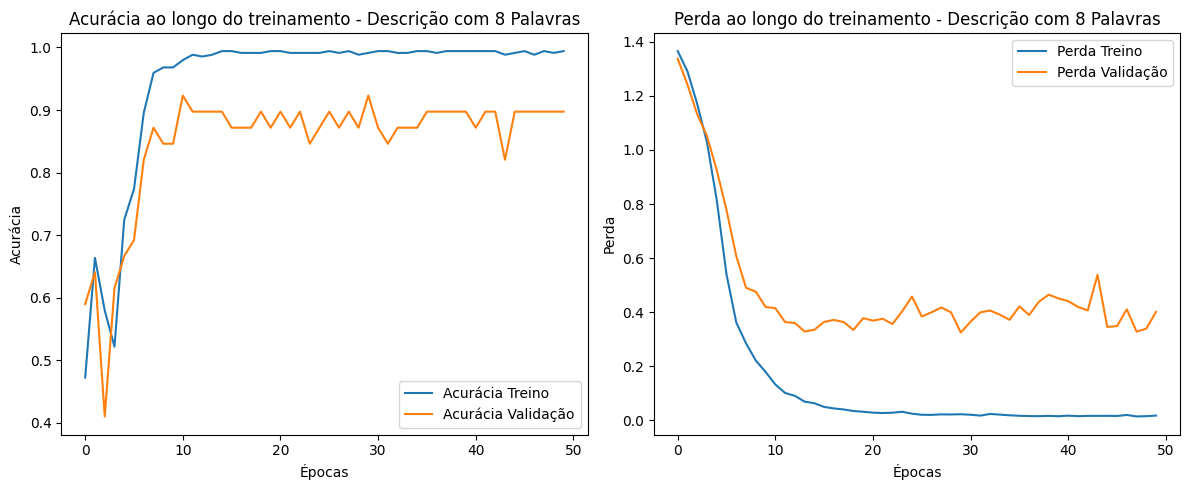

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9544 - loss: 0.1464 
Acurácia do modelo (8 palavras) no conjunto de teste: 94.79%


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Carregar os dados
data = pd.read_csv('/content/drive/MyDrive/Datasets/factoryReports.csv')

# Limitar a descrição a 8 palavras
data['Description_8'] = data['Description'].apply(lambda x: ' '.join(x.split()[:8]))

# Codificar as categorias
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])
categories = pd.get_dummies(data['Category']).values  # One-hot encoding

# Preparar os dados para o modelo
tokenizer_8 = Tokenizer()
tokenizer_8.fit_on_texts(data['Description_8'])
sequences_8 = tokenizer_8.texts_to_sequences(data['Description_8'])
X_8 = pad_sequences(sequences_8, maxlen=8)

# Dividir o conjunto de dados em treino e teste
y_8 = categories
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X_8, y_8, test_size=0.2, random_state=42)

# Criar o modelo
model_8 = Sequential()
model_8.add(Embedding(input_dim=len(tokenizer_8.word_index) + 1, output_dim=50, input_length=X_8.shape[1]))
model_8.add(LSTM(50))
model_8.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compilar o modelo
model_8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history_8 = model_8.fit(X_train_8, y_train_8, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Função para plotar as curvas de treinamento
def plot_training_curves(history, title):
    plt.figure(figsize=(12, 5))

    # Curva de acurácia
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Acurácia Treino')
    plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.title(f'Acurácia ao longo do treinamento - {title}')
    plt.legend()

    # Curva de perda
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Perda Treino')
    plt.plot(history.history['val_loss'], label='Perda Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title(f'Perda ao longo do treinamento - {title}')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plotar curvas de treinamento para 8 palavras
plot_training_curves(history_8, 'Descrição com 8 Palavras')

# Avaliar o modelo no conjunto de teste
test_loss_8, test_accuracy_8 = model_8.evaluate(X_test_8, y_test_8)

print(f"Acurácia do modelo (8 palavras) no conjunto de teste: {test_accuracy_8 * 100:.2f}%")

In [25]:
# Código anterior para preparar e treinar o modelo

# Avaliar o modelo no conjunto de validação
val_loss_8, val_accuracy_8 = model_8.evaluate(X_val, y_val)

print(f"Acurácia do modelo (8 palavras) no conjunto de validação: {val_accuracy_8 * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5139 - loss: 3.0148 
Acurácia do modelo (8 palavras) no conjunto de validação: 52.08%


# Arquitetura 4

Embedding - 50 neuronios

LSTM - 50 neuronios

descricao - 12 palavras

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3878 - loss: 1.3684 - val_accuracy: 0.3846 - val_loss: 1.3005
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4639 - loss: 1.2605 - val_accuracy: 0.3846 - val_loss: 1.1884
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4568 - loss: 1.1778 - val_accuracy: 0.5641 - val_loss: 1.1425
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6380 - loss: 1.0928 - val_accuracy: 0.4615 - val_loss: 1.0779
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6176 - loss: 0.9360 - val_accuracy: 0.6154 - val_loss: 1.0065
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7111 - loss: 0.7934 - val_accuracy: 0.5641 - val_loss: 0.9050
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7533 - loss: 0.5826 - val_accuracy: 0.6667 - val_loss: 0.7206
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7866 - loss: 0.5030 - val_accuracy: 0.7436 - val_loss: 0.

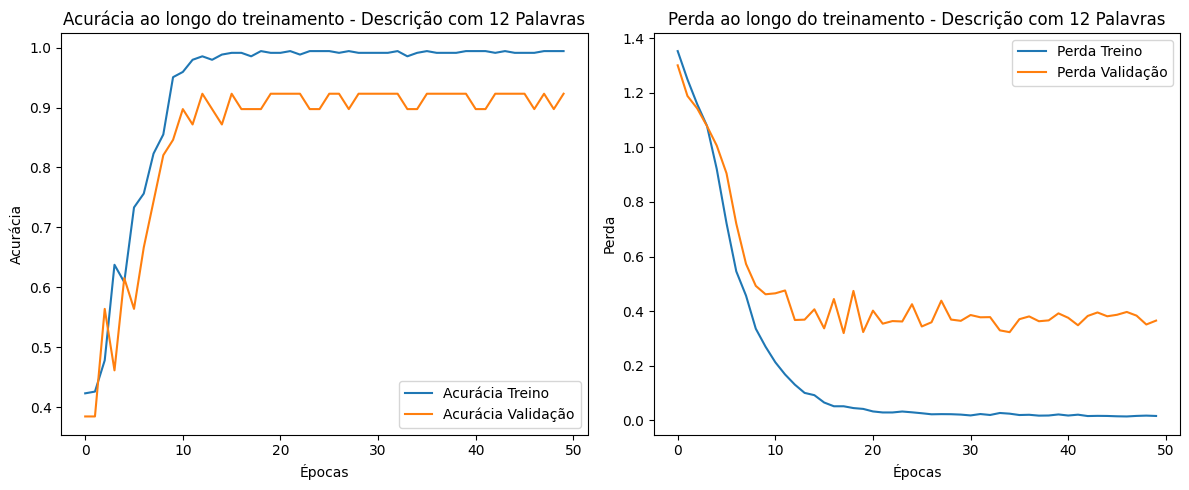

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9635 - loss: 0.1420 
Acurácia do modelo (12 palavras) no conjunto de teste: 95.83%


In [26]:
# Limitar a descrição a 12 palavras
data['Description_12'] = data['Description'].apply(lambda x: ' '.join(x.split()[:12]))

# Preparar os dados para o modelo
tokenizer_12 = Tokenizer()
tokenizer_12.fit_on_texts(data['Description_12'])
sequences_12 = tokenizer_12.texts_to_sequences(data['Description_12'])
X_12 = pad_sequences(sequences_12, maxlen=12)

# Dividir o conjunto de dados em treino e teste
y_12 = categories
X_train_12, X_test_12, y_train_12, y_test_12 = train_test_split(X_12, y_12, test_size=0.2, random_state=42)

# Criar o modelo
model_12 = Sequential()
model_12.add(Embedding(input_dim=len(tokenizer_12.word_index) + 1, output_dim=50, input_length=X_12.shape[1]))
model_12.add(LSTM(50))
model_12.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compilar o modelo
model_12.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history_12 = model_12.fit(X_train_12, y_train_12, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Plotar curvas de treinamento para 12 palavras
plot_training_curves(history_12, 'Descrição com 12 Palavras')

# Avaliar o modelo no conjunto de teste
test_loss_12, test_accuracy_12 = model_12.evaluate(X_test_12, y_test_12)

print(f"Acurácia do modelo (12 palavras) no conjunto de teste: {test_accuracy_12 * 100:.2f}%")


In [27]:
# Código anterior para preparar e treinar o modelo

# Avaliar o modelo no conjunto de validação
val_loss_12, val_accuracy_12 = model_12.evaluate(X_val, y_val)

print(f"Acurácia do modelo (12 palavras) no conjunto de validação: {val_accuracy_12 * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8507 - loss: 0.5929  
Acurácia do modelo (12 palavras) no conjunto de validação: 85.42%
